In [ ]:
!pip install pandas
!pip install scikit-learn
!pip install seaborn
!pip install umap-learn
!pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 7.4 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=878b339873b7cc29166403efe8ae51a8bc3011d7772899edb34cebbd07868e0d
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 15.8 MB/s eta 0:00:00


In [ ]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from cartopy.io.img_tiles import OSM
import os
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import seaborn as sns
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
from umap import UMAP  # Assurez-vous d'avoir la bibliothèque umap-learn installée

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
directory = "/content/gdrive/MyDrive/Valeurs acoustiques/2022/Antras_Isard/"

In [ ]:
csv_file_path = os.path.join(directory, 'Antras_IsardL_E_B_R_vggish_indices.csv')

In [ ]:
df = pd.read_csv(csv_file_path)
df.head(2).T

,0,1
Unnamed: 0,0,1
station_name,2022/Antras_Isard/SM7113_235L_Rouge/Data/,2022/Antras_Isard/SM7113_235L_Rouge/Data/
file_name,SMA07113_20220531_174020.wav,SMA07113_20220531_181002.wav
V1,18,0
V2,196,218
...,...,...
V126,70,0
V127,255,255
V128,221,248
dynamique,Rouge,Rouge


In [ ]:
df_fn_sn = df[['file_name', 'station_name']].copy()

df.drop(columns=["Unnamed: 0", "file_name", "station_name"], inplace= True)

In [ ]:
from sklearn.preprocessing import LabelEncoder


# Instancier LabelEncoder
label_encoder = LabelEncoder()

# Initialiser un dictionnaire pour stocker les correspondances
label_mapping = {}

# Appliquer LabelEncoding aux colonnes qualitatives
qualitative_cols = ['dynamique', 'position']
for col in qualitative_cols:
    df[col] = label_encoder.fit_transform(df[col])
    # Stocker les correspondances dans le dictionnaire
    label_mapping[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Afficher le dictionnaire de correspondance
print("Dictionnaire de correspondance des labels :")
for col, mapping in label_mapping.items():
    print(f"{col}: {mapping}")

# Afficher le DataFrame après les modifications
print("\nDataFrame après les modifications :")
df.head(2).T

Dictionnaire de correspondance des labels :
dynamique: {'Bleu': 0, 'Rouge': 1}
position: {'E': 0, 'L': 1}

DataFrame après les modifications :


,0,1
V1,18,0
V2,196,218
V3,78,93
V4,13,11
V5,31,16
...,...,...
V126,70,0
V127,255,255
V128,221,248
dynamique,1,1


In [ ]:
df_dy_po = df[['dynamique', 'position']].copy()

df_dy_po

,dynamique,position
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
800,0,1
801,0,1
802,0,1
803,0,1


In [ ]:
df.drop(columns=["dynamique", "position"], inplace= True)

In [ ]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128
0,18,196,78,13,31,46,255,158,255,88,...,175,255,0,255,163,255,0,70,255,221
1,0,218,93,11,16,36,255,153,255,58,...,233,247,65,255,200,255,0,0,255,248
2,52,158,83,14,61,20,224,156,251,80,...,118,29,17,204,117,207,0,113,255,255
3,0,223,64,41,0,3,255,137,255,42,...,165,127,0,255,255,255,0,1,255,127
4,19,158,107,0,97,146,104,200,255,114,...,249,248,89,153,255,142,109,228,108,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,11,162,113,0,109,81,236,142,255,163,...,0,174,254,138,193,133,125,188,255,151
801,19,154,156,0,161,127,166,170,255,135,...,90,211,235,83,172,69,126,244,202,181
802,31,138,160,0,184,128,145,172,241,135,...,192,152,179,142,232,111,67,235,85,184
803,71,127,127,0,192,116,130,144,234,142,...,94,35,255,6,145,194,255,90,236,117


---

## Etude pour les NaN



In [ ]:
# Vérifier si merged_df contient des valeurs NaN
if df.isna().any().any():
    print("Le DataFrame contient des valeurs NaN.")
else:
    print("Le DataFrame ne contient pas de valeurs NaN.")

Le DataFrame ne contient pas de valeurs NaN.


In [ ]:
# Localiser les valeurs NaN dans merged_df
nan_locations = df.isna()

# Afficher les positions des valeurs NaN
print("Positions des valeurs NaN :")
print(nan_locations)

# Afficher les lignes contenant des valeurs NaN
nan_rows = df[nan_locations.any(axis=1)]
print("\nLignes contenant des valeurs NaN :")
nan_rows

Positions des valeurs NaN :
        V1     V2     V3     V4     V5     V6     V7     V8     V9    V10  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
800  False  False  False  False  False  False  False  False  False  False   
801  False  False  False  False  False  False  False  False  False  False   
802  False  False  False  False  False  False  False  False  False  False   
803  False  False  False  False  False  False  False  False  False  False   
804  False  False  False  False  False  False  False  False  False  False   

     ...   V119   V120   V121   V122   V123   V

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128


In [ ]:
# Compter le nombre de NaN par colonne
nan_count = df.isna().sum()

# Afficher le nombre de NaN par colonne
print("Nombre de NaN par colonne :")
for feature, val in nan_count.items():
  print(feature, ":", val)

Nombre de NaN par colonne :
V1 : 0
V2 : 0
V3 : 0
V4 : 0
V5 : 0
V6 : 0
V7 : 0
V8 : 0
V9 : 0
V10 : 0
V11 : 0
V12 : 0
V13 : 0
V14 : 0
V15 : 0
V16 : 0
V17 : 0
V18 : 0
V19 : 0
V20 : 0
V21 : 0
V22 : 0
V23 : 0
V24 : 0
V25 : 0
V26 : 0
V27 : 0
V28 : 0
V29 : 0
V30 : 0
V31 : 0
V32 : 0
V33 : 0
V34 : 0
V35 : 0
V36 : 0
V37 : 0
V38 : 0
V39 : 0
V40 : 0
V41 : 0
V42 : 0
V43 : 0
V44 : 0
V45 : 0
V46 : 0
V47 : 0
V48 : 0
V49 : 0
V50 : 0
V51 : 0
V52 : 0
V53 : 0
V54 : 0
V55 : 0
V56 : 0
V57 : 0
V58 : 0
V59 : 0
V60 : 0
V61 : 0
V62 : 0
V63 : 0
V64 : 0
V65 : 0
V66 : 0
V67 : 0
V68 : 0
V69 : 0
V70 : 0
V71 : 0
V72 : 0
V73 : 0
V74 : 0
V75 : 0
V76 : 0
V77 : 0
V78 : 0
V79 : 0
V80 : 0
V81 : 0
V82 : 0
V83 : 0
V84 : 0
V85 : 0
V86 : 0
V87 : 0
V88 : 0
V89 : 0
V90 : 0
V91 : 0
V92 : 0
V93 : 0
V94 : 0
V95 : 0
V96 : 0
V97 : 0
V98 : 0
V99 : 0
V100 : 0
V101 : 0
V102 : 0
V103 : 0
V104 : 0
V105 : 0
V106 : 0
V107 : 0
V108 : 0
V109 : 0
V110 : 0
V111 : 0
V112 : 0
V113 : 0
V114 : 0
V115 : 0
V116 : 0
V117 : 0
V118 : 0
V119 : 0
V120 : 0


In [ ]:
# # Remplacer les NaN par la moyenne de la colonne respective
# df['ACTtMean'].fillna(df['ACTtMean'].mean(), inplace=True)

# Remplacer les NaN par la moyenne de chaque colonne respective
df = df.apply(lambda col: col.fillna(col.mean()))

In [ ]:
# Vérifier si merged_df contient des valeurs NaN
if df.isna().any().any():
    print("Le DataFrame contient des valeurs NaN.")
else:
    print("Le DataFrame ne contient pas de valeurs NaN.")

Le DataFrame ne contient pas de valeurs NaN.


----

## Analyse non supervisée

In [ ]:
# ACP
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df)

# t-SNE
tsne = TSNE(n_components=2, perplexity=5)
tsne_result = tsne.fit_transform(df)

# uMAP
umap_result = UMAP(n_components=2).fit_transform(df)

In [ ]:
# # -----------------
# df = pd.concat([df, df_dy_po], axis=1)

In [ ]:
df["target"] = df_dy_po['dynamique'].astype(str) + df_dy_po['position'].astype(str)

In [ ]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,795,796,797,798,799,800,801,802,803,804
V1,18,0,52,0,19,10,0,54,26,54,...,27,0,33,97,18,11,19,31,71,16
V2,196,218,158,223,158,182,169,146,165,152,...,179,188,139,121,142,162,154,138,127,144
V3,78,93,83,64,107,80,85,101,97,103,...,95,117,123,110,121,113,156,160,127,137
V4,13,11,14,41,0,40,0,38,40,28,...,46,0,38,0,4,0,0,0,0,0
V5,31,16,61,0,97,18,26,91,60,98,...,124,91,159,189,122,109,161,184,192,122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V125,0,0,0,0,109,0,198,160,0,0,...,150,30,156,255,87,125,126,67,255,113
V126,70,0,113,1,228,164,255,160,166,43,...,58,255,220,255,255,188,244,235,90,255
V127,255,255,255,255,108,255,217,162,255,255,...,255,255,234,255,255,255,202,85,236,255
V128,221,248,255,127,255,151,255,0,179,191,...,49,224,141,0,173,151,181,184,117,126


In [ ]:
# dynamique: {'Bleu': 0, 'Rouge': 1}
# position: {'E': 0, 'L': 1}

dy_po = {'00':'Bleu-Estive', '01':'Bleu-Lisiere', '10':'Rouge-Estive','11':'Rouge-Lisiere'}

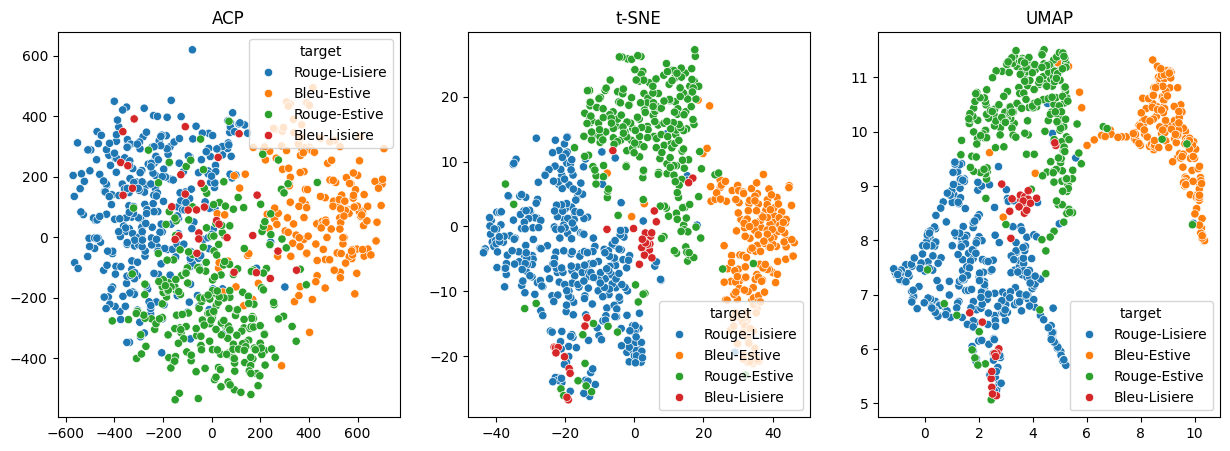

In [ ]:

# Remplacer les codes par les noms correspondants
df['target'] = df['target'].map(dy_po)

# ACP (Analyse en Composantes Principales)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df.drop('target', axis=1))

# t-SNE (t-distributed Stochastic Neighbor Embedding)
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(df.drop('target', axis=1))

# UMAP (Uniform Manifold Approximation and Projection)
umap_result = umap.UMAP().fit_transform(df.drop('target', axis=1))

# Affichage des résultats
plt.figure(figsize=(15, 5))

# ACP
plt.subplot(1, 3, 1)
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df['target'])
plt.title('ACP')

# t-SNE
plt.subplot(1, 3, 2)
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=df['target'])
plt.title('t-SNE')

# UMAP
plt.subplot(1, 3, 3)
sns.scatterplot(x=umap_result[:, 0], y=umap_result[:, 1], hue=df['target'])
plt.title('UMAP')

plt.savefig("/content/gdrive/MyDrive/Valeurs acoustiques/2022/Antras_Isard/Colored_VGGish_acp_tsne_umap_L_E_B_R.png")
plt.show()

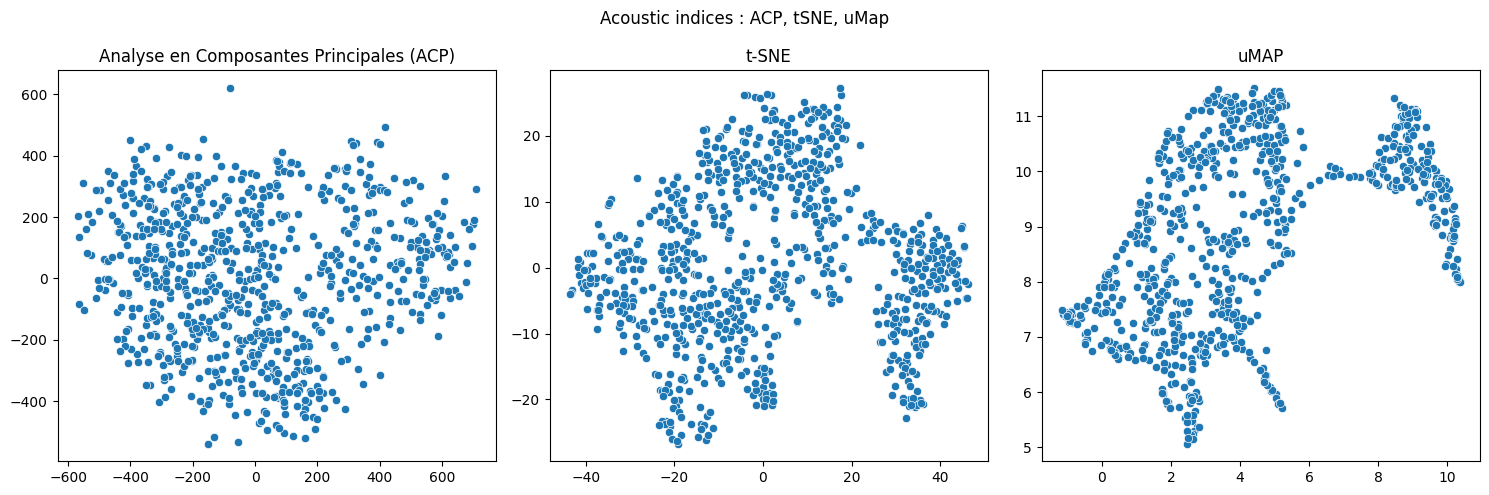

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Créer un tracé avec 3 sous-tracés (subplots)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Affichage des résultats de l'ACP sur le premier subplot
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], ax=axes[0])
axes[0].set_title('Analyse en Composantes Principales (ACP)')

# Affichage des résultats de t-SNE sur le deuxième subplot
sns.scatterplot(x=tsne_result[:,0], y=tsne_result[:,1], ax=axes[1])
axes[1].set_title('t-SNE')

# Affichage des résultats de uMAP sur le troisième subplot
sns.scatterplot(x=umap_result[:,0], y=umap_result[:,1], ax=axes[2])
axes[2].set_title('uMAP')

# Ajouter un titre global au tracé
plt.suptitle('Acoustic indices : ACP, tSNE, uMap')

# Afficher le tracé avec les sous-tracés
plt.tight_layout()
plt.savefig("/content/gdrive/MyDrive/Valeurs acoustiques/2022/Antras_Isard/VGGish_acp_tsne_umap_L_E_B_R.png")
plt.show()